# Very nice plots for our nice poster :)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

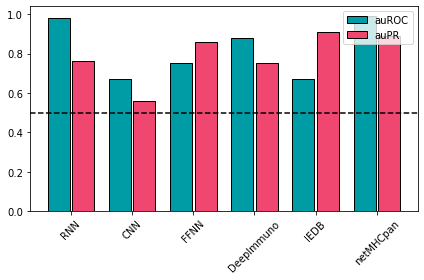

In [34]:

def bar_plot(models, ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point."""
        # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)], edgecolor = "black")

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc='upper right')
    
    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, rotation = 45)


data = {
    "auROC": [0.98, 0.67, 0.75, 0.88,0.67, 0.99],
    "auPR": [0.76, 0.56, 0.86, 0.75, 0.91, 0.89],

}

models = [ "RNN", "CNN", "FFNN", "DeepImmuno","IEDB", "netMHCpan"]
fig, ax = plt.subplots()
bar_plot(models, ax, data, colors=["#009ca6", "#ef476f"], total_width=.8, single_width=.9)
plt.axhline(y=0.5, color='black', linestyle='--')
plt.tight_layout()
plt.savefig("../plots/ROC_PR_barplot.png", dpi = 300)
plt.show()


